In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('ushape.csv', header=None)
df

,0,1,2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0
...,...,...,...
95,1.699453,0.587720,1.0
96,0.218623,-0.652521,1.0
97,0.952914,-0.419766,1.0
98,-1.318500,0.423112,0.0


In [5]:
df.columns = ['X', 'Y', 'class']
df

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0
...,...,...,...
95,1.699453,0.587720,1.0
96,0.218623,-0.652521,1.0
97,0.952914,-0.419766,1.0
98,-1.318500,0.423112,0.0


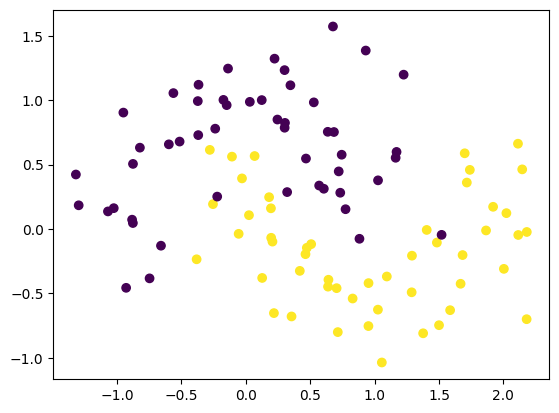

In [6]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [7]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [9]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [10]:
model = Sequential()
model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

D:\Artificial Intelligence\Deep-Learning\ANN-Handwrittn-Digit-Classification\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.get_weights()

[array([[-1.2764832 ,  0.129374  ,  0.704932  ,  0.51023126,  1.7697293 ,
         -0.04819838,  0.9203343 ,  1.379468  ,  1.0994965 , -1.0212693 ],
        [-0.43040675,  0.09846541,  1.4940227 ,  0.7709502 ,  1.7886118 ,
         -0.10197341, -0.74047655,  1.5957268 , -1.1763796 , -1.1481342 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.37000316,  0.18109329, -0.08452949,  0.05216395, -0.7651591 ,
          0.2913957 ,  0.8597094 , -0.33604175, -0.35716546,  0.4179407 ],
        [ 0.38278675,  0.4192489 ,  0.23470505, -0.79391617,  0.49310005,
          0.1715349 ,  0.0838204 ,  0.37148568,  0.4937389 ,  0.06082558],
        [-0.3874804 ,  0.25022036,  0.30344418, -0.5589285 , -0.5481259 ,
         -0.19454817, -0.5235612 , -0.39182705,  0.31515178, -0.42402095],
        [ 0.29137227,  0.30427557, -0.3304076 ,  0.3548597 ,  0.63280743,
          0.83628213, -0.6416369 , -0.8006792 , -0.4196532 , -0.40246326],
        [ 0.03069

In [12]:
initial_weights = model.get_weights()

In [ ]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [13]:
model.set_weights(initial_weights)

In [14]:
model.get_weights()

[array([[-1.2764832 ,  0.129374  ,  0.704932  ,  0.51023126,  1.7697293 ,
         -0.04819838,  0.9203343 ,  1.379468  ,  1.0994965 , -1.0212693 ],
        [-0.43040675,  0.09846541,  1.4940227 ,  0.7709502 ,  1.7886118 ,
         -0.10197341, -0.74047655,  1.5957268 , -1.1763796 , -1.1481342 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.37000316,  0.18109329, -0.08452949,  0.05216395, -0.7651591 ,
          0.2913957 ,  0.8597094 , -0.33604175, -0.35716546,  0.4179407 ],
        [ 0.38278675,  0.4192489 ,  0.23470505, -0.79391617,  0.49310005,
          0.1715349 ,  0.0838204 ,  0.37148568,  0.4937389 ,  0.06082558],
        [-0.3874804 ,  0.25022036,  0.30344418, -0.5589285 , -0.5481259 ,
         -0.19454817, -0.5235612 , -0.39182705,  0.31515178, -0.42402095],
        [ 0.29137227,  0.30427557, -0.3304076 ,  0.3548597 ,  0.63280743,
          0.83628213, -0.6416369 , -0.8006792 , -0.4196532 , -0.40246326],
        [ 0.03069

In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 790ms/step - accuracy: 0.5000 - loss: 1.2237 - val_accuracy: 0.5000 - val_loss: 1.1231
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5000 - loss: 1.1513 - val_accuracy: 0.5000 - val_loss: 1.0602
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5000 - loss: 1.0861 - val_accuracy: 0.5000 - val_loss: 1.0032
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5000 - loss: 1.0208 - val_accuracy: 0.5000 - val_loss: 0.9529
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5125 - loss: 0.9771 - val_accuracy: 0.5000 - val_loss: 0.9090
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5000 - loss: 0.9372 - val_accuracy: 0.5000 - val_loss: 0.8732
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5000 - loss: 0.9032 - val_accuracy: 0.5500 - val_loss: 0.8443
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5000 - loss: 0.8679 - val_accuracy: 0.5500 - val_loss

In [18]:
model.get_weights()

[array([[-1.510419  ,  0.18860142,  0.7741646 ,  0.40529627,  1.8449653 ,
          0.11219566,  0.83615834,  1.2779683 ,  1.1572156 , -1.1715264 ],
        [-0.27902   , -0.08781502,  1.3938453 ,  0.94651943,  1.5537119 ,
         -0.26112825, -0.6157898 ,  1.753764  , -1.0803249 , -1.0368952 ]],
       dtype=float32),
 array([ 0.0331899 ,  0.21475875,  0.03125717, -0.00745352,  0.06980613,
         0.17396802, -0.13686234, -0.01103627, -0.16765754, -0.01303337],
       dtype=float32),
 array([[ 0.5141826 ,  0.3200461 , -0.13069738, -0.08320824, -0.75011086,
          0.54058814,  1.050708  , -0.16079396, -0.17950019,  0.40898398],
        [ 0.51293045,  0.26033366,  0.18251865, -0.93646103,  0.43042836,
          0.14704774, -0.1773279 ,  0.57323277,  0.44367537,  0.12042453],
        [-0.3264348 ,  0.36026073,  0.21993162, -0.6155237 , -0.5937914 ,
         -0.04537527, -0.4670827 , -0.3679542 ,  0.29931772, -0.45352373],
        [ 0.35203964,  0.4384554 , -0.41126484,  0.31047925, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 473us/step


<Axes: >

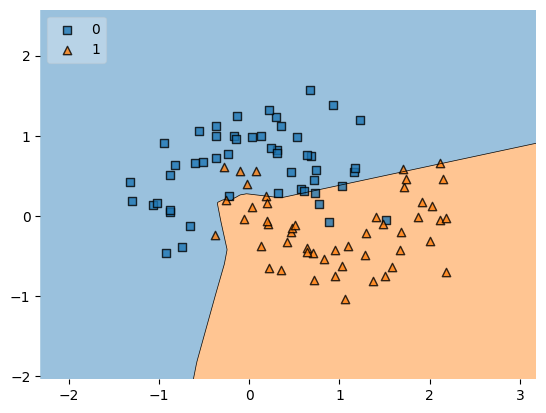

In [19]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [20]:
(np.random.randn(10,10)*0.01).min()

np.float64(-0.026265550519165976)

In [21]:
(np.random.randn(10,10)*0.01).max()

np.float64(0.025916805708798982)